In [1]:
import sys; sys.path.append('/sj0243/')

In [2]:
from python_for_nustar.nu_core import np, plt, os, glob, scan_phase_resolved_products, reduce_list, create_dir, pd, make_grppha_and_wd
from python_for_nustar.nu_class import NustarObservation
from python_for_nustar.pipeline.sj0243_init import Nu_path, ObsList
from python_for_nustar.pyxspec_lib.definitions import Model, Xset, AllModels, Fit, Plot, AllData, AllModels, xspec, showmodel
from python_for_nustar.pyxspec_lib.nustar_xspec import fit_spectra, ph_res_param, query_par, scan_containers_ph_res, plot_ph_res_storage
from python_for_nustar.pyxspec_lib.storage import Container, Storage
#prodpath_ph_res = 'phase_resolved' 
prod_shift = 0
ObsID = ObsList[3] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'
model_name = 'relxilllp'
AllModels.lmod('relxill', '/sj0243/python_for_nustar/relxill_model/')
calc_errors = True

AllModels.clear()
Xset.parallel.error = 22



pd.set_option('display.max_columns', 500)


###
Observation 90302319008 loaded successfully


## Phase-averaged spectra

 *** loading RELXILL model (version 1.4.3) *** 


rm: cannot remove 'xspec/relxilllp/*90302319008_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319008_relxilllp*': No such file or directory


deleted xspec/relxilllp/*90302319008_relxilllp* and xspec/relxilllp/xcm/*90302319008_relxilllp* files
Try loading storage xspec/relxilllp/90302319008_relxilllp.storage
no storage found. fitting...
 loaded spe_and_lcA_sr.pi and spe_and_lcB_sr.pi from /sj0243/results/out90302319008/products/spe_and_lc
fitting done
skipping errors for: []
    18     0.997441     0.999856    (-0.00120631,0.00120867)
     3      1.04609       1.1025    (-0.0309839,0.0254225)
     4       342.41      384.249    (-17.9841,23.8557)
     8      47.5142      57.0828    (-5.04622,4.52236)
    11     0.752486     0.796218    (-0.0207257,0.0230057)
    12      3.37953      3.47181    (-0.0484503,0.0438224)
    14      17.4152      18.0359    (-0.287616,0.333028)
    15    0.0856762     0.104124    (-0.00799761,0.0104497)
    17      0.18531     0.189102    (-0.00181559,0.00197717)
Fit done 
 chi2 = 3235.529260304745 for 2736 dof, chi2_red = 1.182576484029512, H0 prob = 8.312754854e-11


***Warning: Identical values of the parameter give different values of the statistic.
Please check your result for the high end of the confidence range.


<Storage with 2 containers>


,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90302319008_relxilllp_FPMA,constant,factor,1,1.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
1,0,90302319008_relxilllp_FPMA,phabs,nH,2,0.800000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
2,0,90302319008_relxilllp_FPMA,bbodyrad,kT,3,1.077078,1.046095,1.102501,FFFFFFFFF,0.014898,False,
3,0,90302319008_relxilllp_FPMA,bbodyrad,norm,4,360.393719,342.409671,384.249391,FFFFFFFFF,11.269183,False,
4,0,90302319008_relxilllp_FPMA,relxilllp,h,5,5.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
5,0,90302319008_relxilllp_FPMA,relxilllp,a,6,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
6,0,90302319008_relxilllp_FPMA,relxilllp,Incl,7,10.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
7,0,90302319008_relxilllp_FPMA,relxilllp,Rin,8,52.560442,47.514219,57.082798,FFFFFFFFF,2.939915,False,
8,0,90302319008_relxilllp_FPMA,relxilllp,Rout,9,57.816486,0.000000,0.000000,FFFFFTFFF,0.000000,False,= 1.1*p8
9,0,90302319008_relxilllp_FPMA,relxilllp,z,10,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,


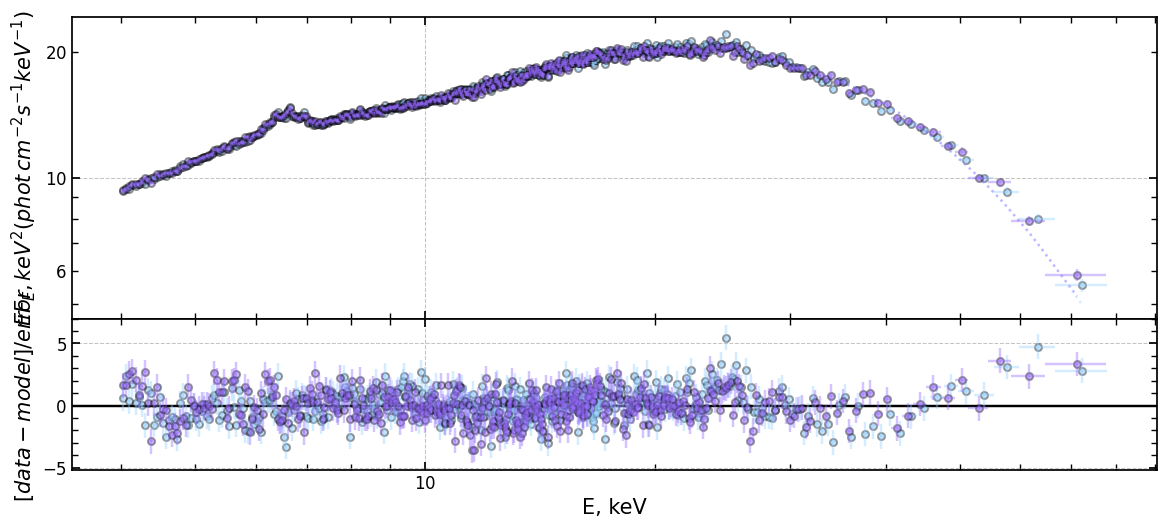

In [3]:
os.chdir(ph_ave_folder)
create_dir('xspec')



mo_cutoffpl = Model("constant*phabs*(bbodyrad+relxilllp)")
mo_cutoffpl.phabs.nH = '0.8 -1'



mo_cutoffpl.bbodyrad.kT = '1.2'
mo_cutoffpl.bbodyrad.norm = '300' # ,, 0.1, 0.2, 3, 4'



mo_cutoffpl.relxilllp.h = '5 -1'
mo_cutoffpl.relxilllp.a = '0 -1'
mo_cutoffpl.relxilllp.Incl = '10'
mo_cutoffpl.relxilllp.Incl.frozen = True
mo_cutoffpl.relxilllp.Rin = '70 0.1, 0, 0, 900, 900'
mo_cutoffpl.relxilllp.Rout = '=1.1*p8'
mo_cutoffpl.relxilllp.z = '0 -1'
mo_cutoffpl.relxilllp.gamma = '1.2  0.005 0.3 0.3 3 3'
mo_cutoffpl.relxilllp.logxi = '4'
mo_cutoffpl.relxilllp.Ecut = '20'
mo_cutoffpl.relxilllp.Ecut.frozen = False
mo_cutoffpl.relxilllp.refl_frac = '0.3'
mo_cutoffpl.relxilllp.fixReflFrac = '0'
mo_cutoffpl.relxilllp.Afe = '5 -1'

mo_fid_pars = fit_spectra(model = mo_cutoffpl, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', min_bin='50', min_sig='50', rewrite = True, calc_errors = calc_errors, eqw_comps='')
mo_fid_pars

## Phase-resolved spectra

#### fit

In [3]:
xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/{model_name}/xcm/{ObsID}_{model_name}.xcm_model')

model = AllModels(1)
model.bbodyrad.kT.frozen = True
model.bbodyrad.norm.frozen = True
model.relxilllp.logxi.frozen = True
model.relxilllp.Rin.frozen = True


 *** loading RELXILL model (version 1.4.3) *** 


##################### bin number 1 #####################
deleted xspec/relxilllp/*90302319008_bin1_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319008_bin1_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319008_bin1_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90302319008_bin1_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319008_bin1_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin1A_sr.pi and phase_resolved_bin1B_sr.pi from /sj0243/results/out90302319008/products/phase_resolved
fitting done
skipping errors for: []
    18     0.992211      1.00036    (-0.00406693,0.00408298)
    11     0.508628     0.562606    (-0.0272675,0.0267102)
    14      13.4878      14.0942    (-0.299036,0.307342)
    15     0.144365     0.162141    (-0.00883583,0.00894019)
    17     0.103807     0.107216    (-0.00169489,0.00171431)
Fit done 
 chi2 = 1765.0871495636388 for 1600 dof, chi2_red = 1.1031794684772742, H0 prob = 0.00228905446
<Storage with 2 containers>


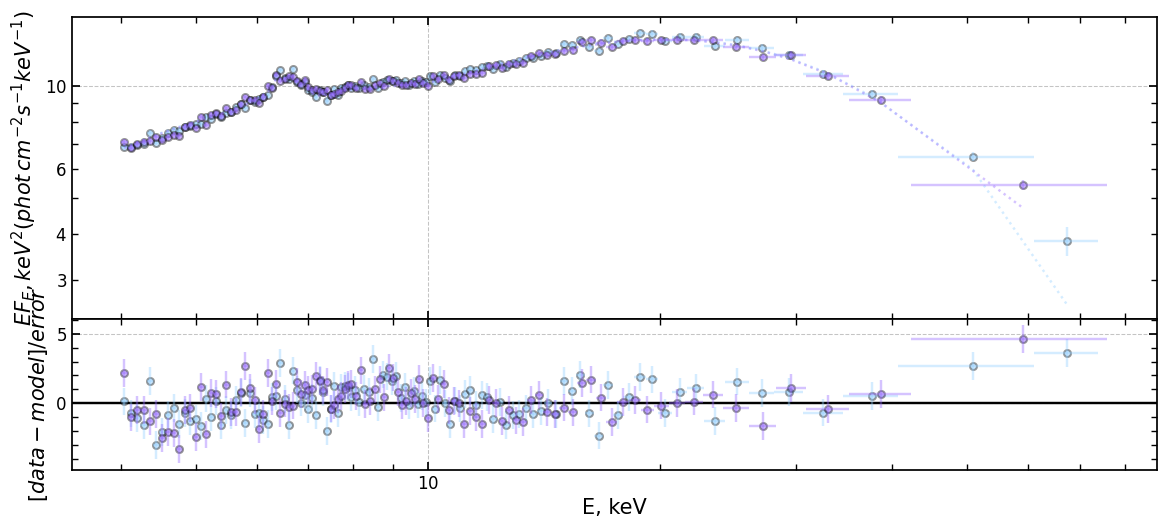

In [5]:
os.chdir(ph_res_folder)
create_dir('xspec')
for binnum in range(1,2):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}_shift{prod_shift}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=calc_errors, eqw_comps='')


#### plot results

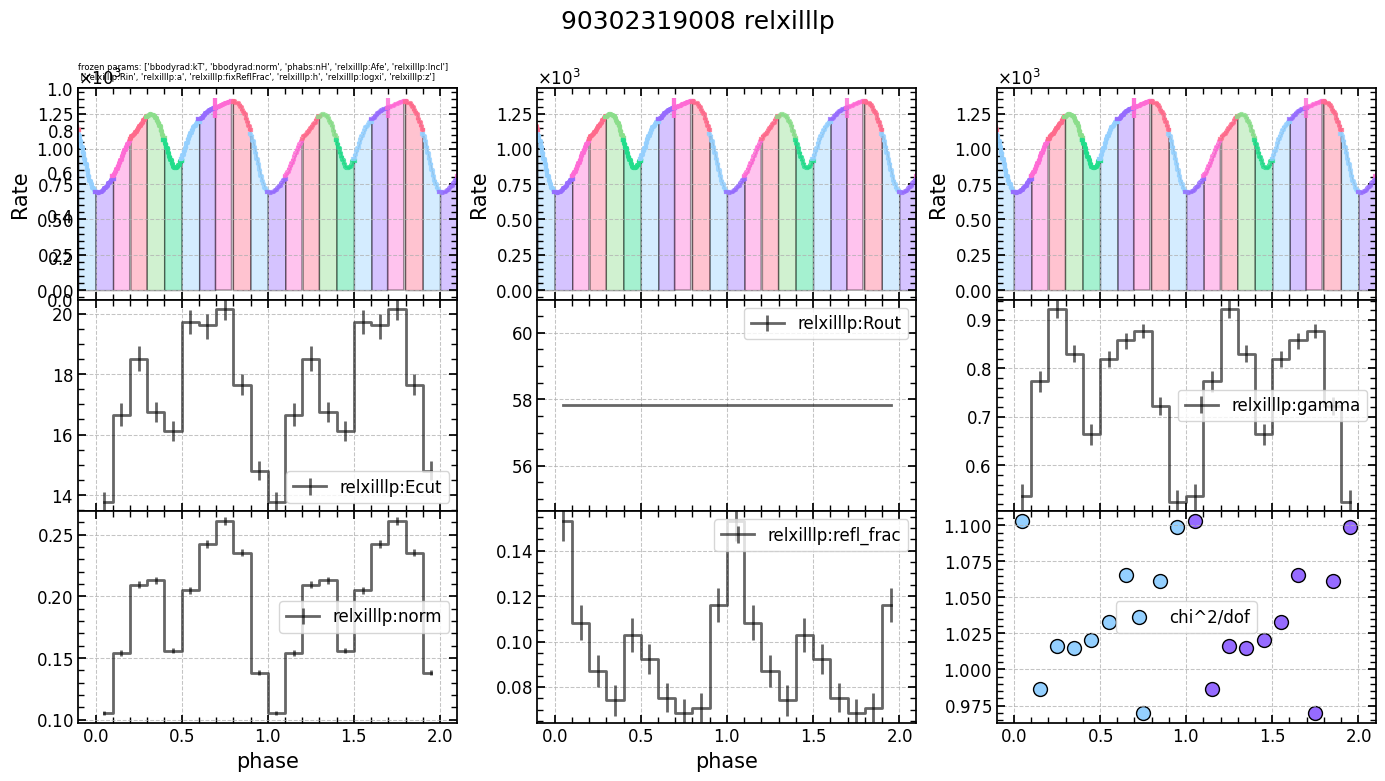

In [6]:
os.chdir(ph_res_folder)
ph_res_results_reind = scan_containers_ph_res(model_name)
ph_res_results_reind = ph_res_results_reind.sort_index()
#ph_res_results_reind.head(25)
plot_ph_res_storage(ph_res_results_reind, nu_obs, 'phase_resolved');
